# Quantum Error Correction
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$

In this tutorial, we discuss the nature of errors present in qubits. We then derive and implement a circuit that attacks the special case where the error in a qubit is a complete bit flip. 

***
## Contributors

Adapted by Jacques Carolan from Andrew Selzler, Yin Li, Frederick Ira Moxley III

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, execute, BasicAer
from qiskit.tools.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

/Users/jacquescarolan/anaconda2/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


## Introduction

Through any quantum computation, errors become present in qubits through thermal fluctuations, mechanical vibrations or other interactions between whatever the qubits are made out of and the environment around them. The state of the qubits then morphs into one that it was not supposed to be and ruins the computation further down the line. Because of this, the concept of quantum error correction is very neccesary to achieve future advancements in quantum computing. A question that may be raised is how does one correct for errors in qubits if they have to measure the qubits to see what the errors are. And if this is done, how is the state of the qubit preserved after the measurement which should have destroyed it? 

Very clever methods have been developed by people over the years to attack this issue. The idea that we will be exploring involves the use of "ancilla" qubits. These are qubits that are placed in the same circuit as the qubits involved in the actual computation. If the state of the qubits involved in the computation are changed through unwanted interaction with the environment, the ancilla qubits will also be changed in such a way that if we were to measure the ancilla qubits, they would give the needed information about what errors were produced in the qubits involved in computation. We would then be able to recover the states of those qubits accordingly without needing or having any information about what those states actually are. 

As stated earlier we will be looking at the simple (but somewhat unrealistic) case where the error produced in qubits is a complete bit flip. This corresponds to an X gate being added unwantingly to the circuit and flipping the state of the affected qubit. 

## Building the Encoder

We will begin the strategy by taking one qubit worth of information and encoding it into three actual qubits. These three qubits are known as codewords. This can be done by introducing the states $\vert \tilde0 \rangle = \vert 000 \rangle$ and $\vert \tilde1 \rangle = \vert 111 \rangle$. Then, a superposition of the two states can be created as $\alpha \vert 000 \rangle + \beta \vert 111 \rangle$. One might create this state on a machine through the use of CNOT gates as shown in the below picture.

In [2]:
from IPython.display import Image

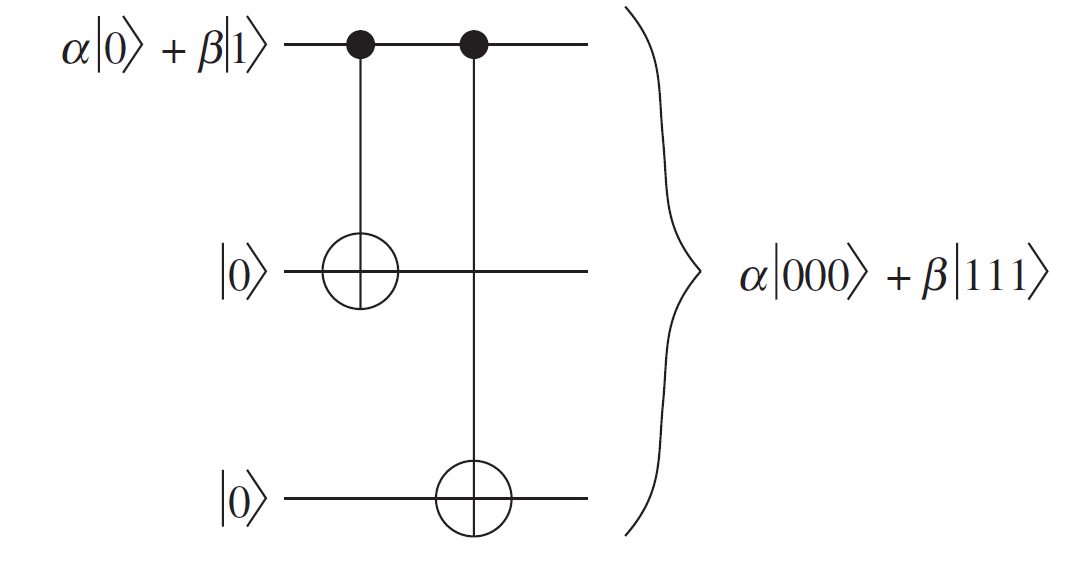

In [3]:
Image(filename="error_correction_files/error_correction_1_0.png", width=450, height=300)

### 1.0

Confirm the above circuit works as expected for $\alpha=1, \beta=0$ and $\beta=1, \alpha=0$. Once you have built the quantum circuit `qc_code` (and before you have applied any operations) you can initialize the input qubit `q_input` via:

`
qc_code.initialize(np.array([alpha, beta]), [q_input[0]])
`

(this saves you having to write out the full $n$-qubit vector)

*Extra.*  Try using the `state_simulator` backend, or any other method, to confirm it preserves the phase between $\ket{0}$ and $\ket{1}$.

In [1]:
# Initialize the qubits

# Initialize the classical registers

# Build Code Quantum Circuit

# Set the initial state using the function above.  Have alpha and beta as variables

# Perform the CX operations


# Add Barier and Measure

# Load backend QasmSimulator and run the job


# select the number of shots (repeats) of the experiment, and run the job
# job = execute(qc_code, backend, shots=1024, backend_options=opts)


# get the counts (how many events in each bin) + print

# plot


In [2]:
# draw the circuit just to check


A bit flip error on our code word will look like the following:

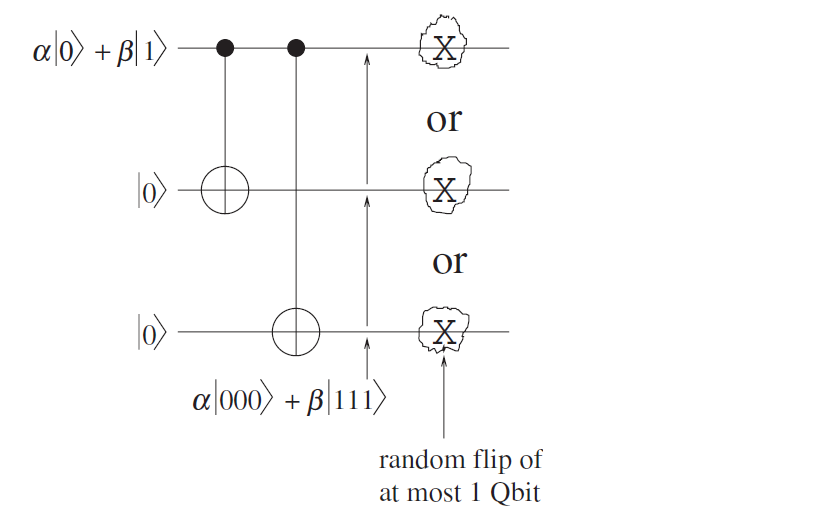

In [19]:
Image(filename="error_correction_files/error_correction_3_0.png", width=450, height=300)   

### 1.1
We are going to assume that only one of the three qubits will be affected by the bit erroneous bit flip.  If the bit flip happens with some small probability $p$, is this reasonable?

*Answer:* It is safe to assume that only one of the three qubits will be affected. This is because if the probability of any one of the three qubits being affected by an unwanted X gate is sufficiently low in a given time interval, the probability of two or more qubits being affected in that same interval is negligible.

Next we want to detect whether an error has occured on our logical qubits.  We could of course measure the qubits and check, but that would destroy our precious quantum information!  To do this we are going to:

- entangle our encoded qubits with some ancilla (extra) qubits
- make measurements on the ancilla qubits
- dependent on the measurement outcomes, perform operations on the encoded qubits to 'fix' fix them in case an error occured.

We will do this via the following circuit:

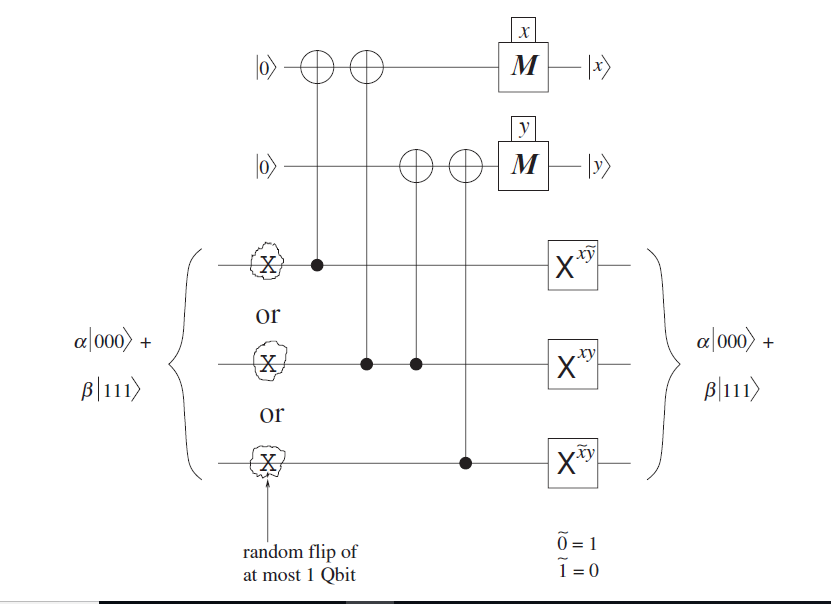

In [4]:
Image(filename="error_correction_files/error_correction_5_0.png", width=450, height=300)  

We call this a 'syndrome' circuit.  The top two qubits are the syndrome qubits, and the bottom three are our encoded qubits.  Measurements are performed on the ancilla qubits and the outcome of the first ancilla qubit (either "0" or "1") is assigned the value $x$, the outcome of the second ancilla qubit is assigned the value $y$.  

### 1.2
- Build the both the encoder circuit and the syndrome circuit with the option of applying an X operation to an encoded qubit
- Setting $\alpha=1, \beta=0$, what happens to the syndrome qubits when you have no error?
- What happens when you have one of the three possible $X$ errors?
- Repeat the above for $\alpha=0, \beta=1$

In [3]:
###### INITIALIZE QUANUTM AND CLASSICAL REGISTERS ##########

# Initialize the input qubits

# Initialize the classical registers

# Build ancilla QC

# Initialize the syndrome quantuim and classical registers

# Build syndrome QC


######## SET THE INPUT QUANTUM STATE #########


###### PERFORM THE ENCODER OPERATIONS ######
# Perform the CX operations


###### ERROR #####
# perform X operations on one of the encoded logical qubits

###### PERFORM THE SYNDROME OPERATIONS #####
# build the full circuit (code and syndrome)

# perform the control operations

###### DEFINE ALL MEASUREMENTS ####

##### DRAW IT JUST TO MAKE SURE ####


In [4]:
#### SIMULATE IT #####

# Load backend QasmSimulator and run the job


# select the number of shots (repeats) of the experiment, and run the job


# get the counts (how many events in each bin)


# plot


### 1.3

Letting the outcome of measurement on `q_syndrome_ancilla[0]` be $x$, and `q_syndrome_ancilla[1]` be $y$ confirm that the following operations will correct the logical qubit:

- $X^{x  \tilde{y}}$ on `q_input[0]`
- $X^{x  y}$ on `q_code_ancilla[0]`
- $X^{\tilde{x}  y}$ on `q_code_ancilla[1]`

where the superscript tells you how many times to apply the operation, and tilde is the not operation: $\tilde{0}=1, \tilde{1}=0$

### 1.4

Finally use the conditional function `qc.x(q[0]).c_if(c, 0)` to correct the errors.

In [ ]:
# qc = QuantumCircuit(q, c)
# qc.x(q[0]).c_if(c, 0)
# qc.measure(q,c)
# qc.draw()

### Extra: 1.5. Try implementing the full circuit

In this circuit the top two qubits are the ancilla qubits and the bottom three qubits are the codewords for the qubit involved in the calculation. Now suppose that $\alpha$ is equal to 1 and $\beta$ is equal to zero so that the initial state is $\vert 000 \rangle$. Depending on which qubit gets affected by the unwanted X gate (or if no qubit gets affected at all), the state can end up as one of four possibilities, $\vert 000 \rangle$, $\vert 100 \rangle$, $\vert 010 \rangle$, and $\vert 001 \rangle$. The ancilla qubits are initially in the state $\vert 00 \rangle$. When the three codeword qubits pass through the next four CNOT gates, one can confirm that with the four possible states of the three codeword qubits listed, the ancilla qubits will take the four possible states $\vert 00 \rangle$, $\vert 10 \rangle$, $\vert 11 \rangle$, and $\vert 01 \rangle$ respectively. 

Amazingly, these four states would appear in the same order if the initial state of the three codeword qubits was $\vert 111 \rangle$ instead. For example if the first of the three codeword qubits were flipped, the state of the ancilla qubits would end up as $\vert 10 \rangle$ whether the initial state of the three codeword qubits was $\vert 000 \rangle$ or $\vert 111 \rangle$. This means that the ancilla qubits would end up the same way for any initial superposition $\alpha \vert 000 \rangle + \beta \vert 111 \rangle$ of the three codeword qubits again due to the linearity of the circuit.

Now when the ancilla qubits are measured, x is the result of the first qubit and y is the result of the second qubit. These results are then used to determine how many times (either 0 or 1) each of the three codeword qubits will be flipped by another X gate. Suppose for example that the first of the three codeword qubits got flipped by an unwanted X gate in the beginning. Then the ancilla qubits would be affected so that x is equal to 1 and y is equal to 0. Then $x \tilde y = 1$, $xy = 0$, and $\tilde x y = 0$. This means the first codeword qubit is the only one that gets flipped at this stage, which is good since it is the first codeword qubit that received the error to begin with. One can check with this circuit that with an initial state $\alpha \vert 000 \rangle + \beta \vert 111 \rangle$, any qubit that gets flipped by an unwanted X gate ends up getting flipped back by the final three X gates, which means this circuit succeeds in correcting for any bit flip error produced in the three codeword qubits.

It would be nice however, to create a circuit that performs the same task as above but does not rely on the results of measuring the ancilla qubits partway through. The circuit that does this, which is also the circuit that we will be implementing in this notebook is shown below. 

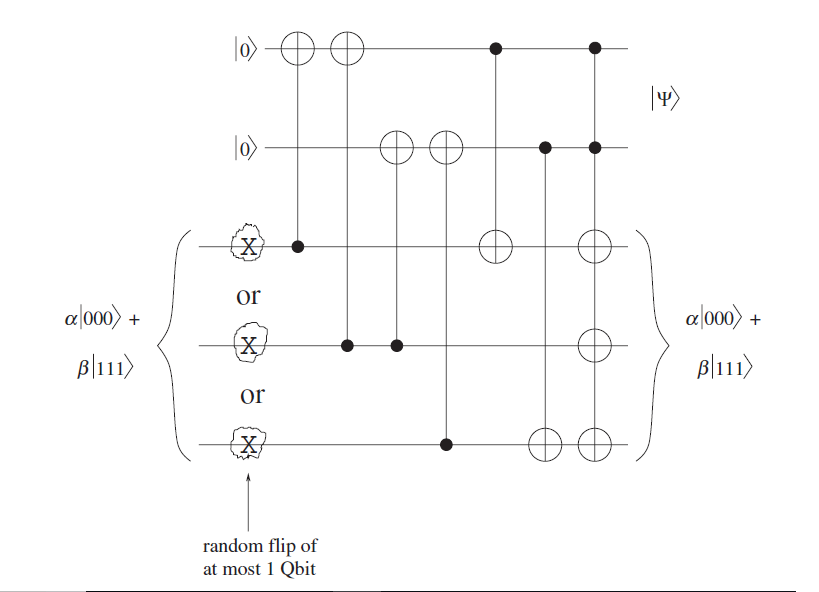

In [5]:
Image(filename="error_correction_files/error_correction_7_0.png", width=450, height=300)    

The measurements and X gates are replaced with CNOT gates and a double toffoli gate acting on all three codeword qubits. The function of this last gate is to flip all three codeword qubits if the ancilla qubits are in the state $\vert 11 \rangle$ and do nothing otherwise. With this, we are ready to use qiskit to actually create the circuit.

In [6]:
# qc = QuantumCircuit(q, c)
# qc.x(q[0]).c_if(c, 0)
# qc.measure(q,c)
# qc.draw()




Below is the code to add the circuit elements. The first three X gates act as the source of error to the codeword qubits. Include or comment out any of the three X gates to see different results of the program. For example, commenting out the third X gate would leave the codeword qubits in the state  |110⟩|110⟩ . This should correspond to an initial state of  |111⟩|111⟩  with a bit flip error introduced in the third qubit, which means the output of the three codeword qubits should be  |111⟩|111⟩  if everything worked properly.

Next are the CNOT gates that make the circuit and the three Toffoli gates. There are three Toffoli gates because the original circuit called for a Toffoli gate that acted on all three qubits. This is equivalent to having three separate Tofolli gates that each act on a different qubit as one can confirm.



In [9]:
#circuit.x(quantum_r[2])
circuit.x(quantum_r[3])
circuit.x(quantum_r[4])

circuit.cx(quantum_r[2],quantum_r[0])
circuit.cx(quantum_r[3],quantum_r[0])
circuit.cx(quantum_r[3],quantum_r[1])
circuit.cx(quantum_r[4],quantum_r[1])

circuit.cx(quantum_r[0],quantum_r[2])
circuit.cx(quantum_r[1],quantum_r[4])
toffoli(circuit,quantum_r,0,1,2)
toffoli(circuit,quantum_r,0,1,3)
toffoli(circuit,quantum_r,0,1,4)

circuit.measure(quantum_r[0], classical_r[0])
circuit.measure(quantum_r[1], classical_r[1])
circuit.measure(quantum_r[2], classical_r[2])
circuit.measure(quantum_r[3], classical_r[3])
circuit.measure(quantum_r[4], classical_r[4])

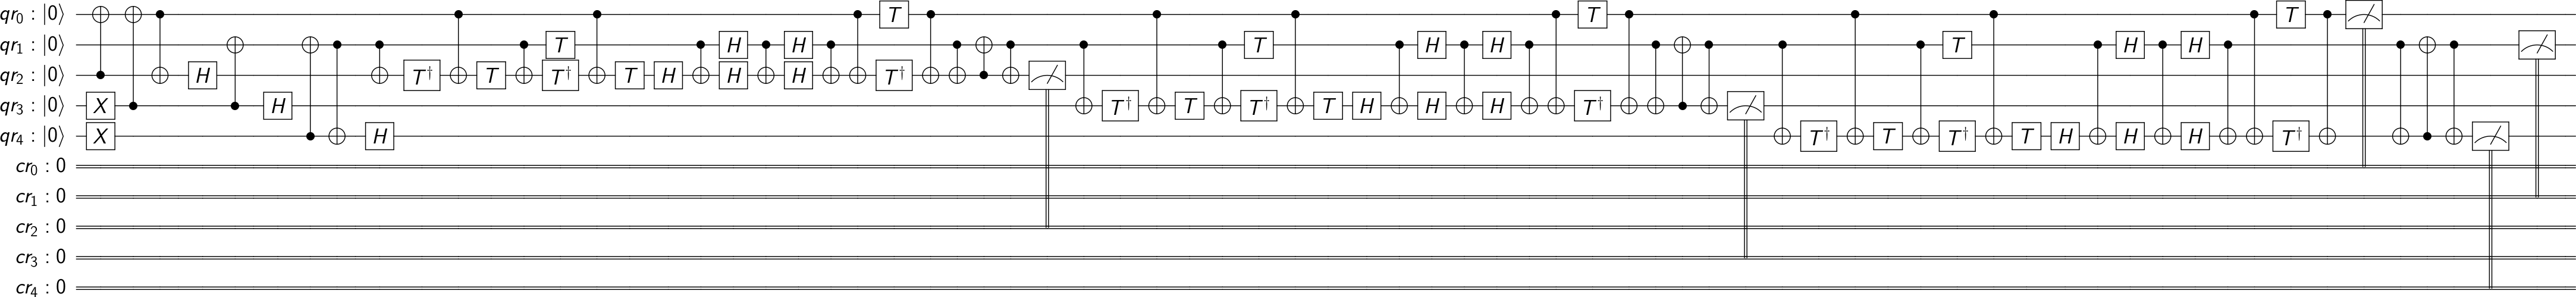

In [10]:
# plot the circuit
circuit_drawer(circuit)

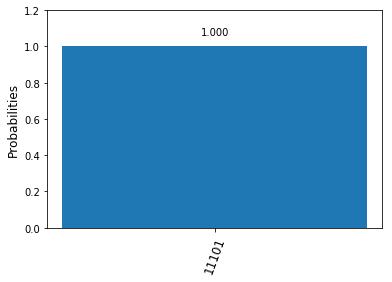

In [11]:
"""
Results of the computation. Note that the states of the five qubits
from up to down in the circuit are shown from right to left in the result. 
"""
# use local qasm simulator
backend = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend=backend, shots=1024).result()
plot_histogram(result.get_counts())